# <center>Organizaci&oacute;n de Datos</center>
## <center>Trabajo Práctico 1 : Reservas de Hotel</center>
## <center>Checkpoint 3</center>
### <center>Redes Neuronales</center>

#### Integrantes grupo 19: Sudanalytics 
* Adrian Leandro Re
* Alan Toulouse
* Luciano Lorenzo
* Nicolas Tonizzo

## Ensamble híbrido
Cargaremos los modelos creados con las notebooks anteriores usando la libreria pickle

In [1]:
import pickle
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer, f1_score, confusion_matrix, precision_score, recall_score, accuracy_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
import tensorflow as tf

2023-05-21 12:45:34.371435: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-21 12:45:35.003138: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-21 12:45:35.006251: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-21 12:45:36.887945: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
df = pd.read_csv("../dataset/hotels_train_procesado.csv")
df.columns

Index(['hotel', 'lead_time', 'arrival_date_year', 'arrival_date_month',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'meal', 'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status_date', 'id', 'is_canceled', 'hotel_encoding',
       'tiene_hijos', 'es_extranjero', 'es_portugues', 'es_ingles',
       'es_frances', 'es_espanol', 'es_aleman', 'reserved_room_was_assigned',
       'required_a_car_parking_space', 'solo_desayuna_en_el_hotel',
       'pidio_todas_comidas', 'reservo_online', 'reservo_en_grupo',
       'reservo_sin_reembols

Declaramos el target y los features del dataframe que vamos a utilizar para predecir.

In [3]:
target = "is_canceled"

attrs = [
    "hotel_encoding",
    
    "lead_time",
    "reservo_el_mismo_dia",
    "adr",

    "stays_in_weekend_nights",
    "stays_in_week_nights",

    "tiene_hijos",
    "adults",
    #"children",
    #"babies",

    # Fechas
    "arrival_date_week_number",
    "arrival_date_day_of_month",
    "arrival_date_year",

    "es_extranjero",
    #"es_portugues",
    #"es_ingles",
    #"es_frances",
    #"es_espanol",
    #es_aleman",

    "reserved_room_was_assigned",

    "is_repeated_guest",
    "previous_cancellations", 
    #"previous_bookings_not_canceled",
    "total_reservas_previas",
    "total_of_special_requests",
    "booking_changes",

    # 'meal',
    "solo_desayuna_en_el_hotel",
    "pidio_todas_comidas",

    'required_car_parking_spaces',
    "required_a_car_parking_space",

    "reservo_sin_reembolso",
    "reservo_sin_depositar",
    "reservo_online",
    "reservo_en_grupo",
    "reservo_sin_compania",
    "reservo_sin_agente",
    "reservo_sin_paquete",
    
    "days_in_waiting_list",
    "tuvo_dias_de_espera",
    
    "agent9",
    "agent240",
    "agent1",
    "agent14",
    "agent6",
]

**Dividimos el dataset en entrenamiento y validacion**, para poder validar que no estamos overfitteando al dataset de entrenamiento, y que los modelos van a predecir bien a registros no vistos anteriormente. 

In [18]:
X = df[attrs].values
y = df[target].values

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, shuffle=True)
X_train.shape

(46434, 36)

In [5]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(400, input_shape=X[1,:].shape, activation=keras.activations.elu))
model.add(keras.layers.Dense(250, activation=keras.activations.elu))
model.add(keras.layers.Dense(250, activation=keras.activations.elu))
model.add(keras.layers.Dense(50, activation=keras.activations.relu))
model.add(keras.layers.Dense(1, activation=keras.activations.sigmoid))

In [6]:
model.compile(loss=keras.losses.binary_crossentropy,
    optimizer=keras.optimizers.Adagrad(learning_rate=0.01),
    metrics=[keras.metrics.sparse_categorical_accuracy]
)
model.summary() 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 400)               14800     
                                                                 
 dense_1 (Dense)             (None, 250)               100250    
                                                                 
 dense_2 (Dense)             (None, 250)               62750     
                                                                 
 dense_3 (Dense)             (None, 50)                12550     
                                                                 
 dense_4 (Dense)             (None, 1)                 51        
                                                                 
Total params: 190,401
Trainable params: 190,401
Non-trainable params: 0
_________________________________________________________________


In [7]:
history = model.fit(X_train, y_train,
                    epochs=10,
                    batch_size=45,
                    validation_data=(X_val, y_val))

Epoch 1/10
1032/1032 [==============================] - 4s 4ms/step - loss: 0.3646 - sparse_categorical_accuracy: 0.4998 - val_loss: 0.3438 - val_sparse_categorical_accuracy: 0.5016
Epoch 2/10
1032/1032 [==============================] - 3s 3ms/step - loss: 0.3317 - sparse_categorical_accuracy: 0.4998 - val_loss: 0.3291 - val_sparse_categorical_accuracy: 0.5016
Epoch 3/10
1032/1032 [==============================] - 3s 3ms/step - loss: 0.3211 - sparse_categorical_accuracy: 0.4998 - val_loss: 0.3222 - val_sparse_categorical_accuracy: 0.5016
Epoch 4/10
1032/1032 [==============================] - 3s 3ms/step - loss: 0.3151 - sparse_categorical_accuracy: 0.4998 - val_loss: 0.3184 - val_sparse_categorical_accuracy: 0.5016
Epoch 5/10
1032/1032 [==============================] - 3s 3ms/step - loss: 0.3109 - sparse_categorical_accuracy: 0.4998 - val_loss: 0.3139 - val_sparse_categorical_accuracy: 0.5016
Epoch 6/10
1032/1032 [==============================] - 3s 3ms/step - loss: 0.3071 - spars

In [8]:
# Test, Loss and accuracy
loss_and_metrics = model.evaluate(X_val, y_val)
print('Loss = ',loss_and_metrics[0])
print('Accuracy = ',loss_and_metrics[1])

484/484 [==============================] - 1s 1ms/step - loss: 0.3062 - sparse_categorical_accuracy: 0.5016
Loss =  0.3062385320663452
Accuracy =  0.5015828013420105


In [9]:
y_pred = model.predict(X_val)
y_pred = np.where(y_pred >= 0.5, 1, 0)
print("f1 score sobre validacion:", f1_score(y_val, y_pred))

484/484 [==============================] - 1s 1ms/step
f1 score sobre validacion: 0.8553345388788427


In [10]:
y_pred = model.predict(X_train)
y_pred = np.where(y_pred >= 0.5, 1, 0)
print("f1 score sobre train:", f1_score(y_train, y_pred))

1452/1452 [==============================] - 2s 1ms/step
f1 score sobre train: 0.8608082928187445


## Matrices de confusion

Ploteamos la confusion matrix del set de entrenamiento

1452/1452 [==============================] - 2s 1ms/step


Text(0.5, 1.0, 'Confusion matrix de training set')

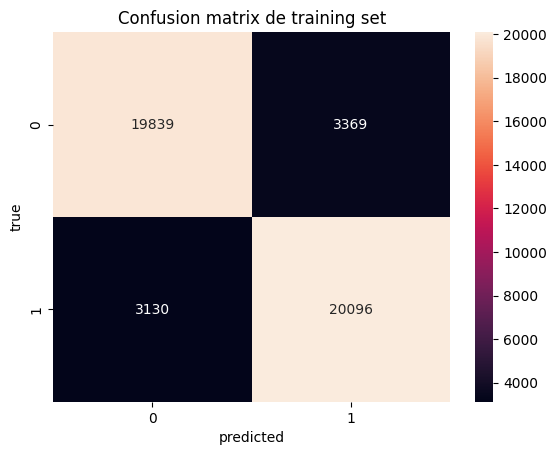

In [11]:
y_pred = np.where(model.predict(X_train) >= 0.5, 1, 0)
confusion = confusion_matrix(y_train, y_pred)
sns.heatmap(confusion, annot=True, fmt='.0f')
plt.ylabel('true')
plt.xlabel('predicted')
plt.title("Confusion matrix de training set")

Ploteamos la confusion matrix del set de validación

484/484 [==============================] - 1s 1ms/step


Text(0.5, 1.0, 'Confusion matrix del validation set (voting)')

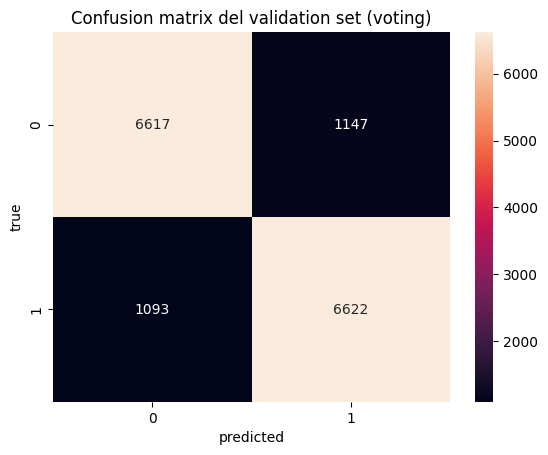

In [12]:
y_pred = np.where(model.predict(X_val) >= 0.5, 1, 0)
confusion = confusion_matrix(y_val, y_pred)
sns.heatmap(confusion, annot=True, fmt='.0f')
plt.ylabel('true')
plt.xlabel('predicted')
plt.title("Confusion matrix del validation set (voting)")

# Creacion de submit

In [30]:
def create_submission(model): 
    df_test = pd.read_csv("../dataset/hotels_test_procesado.csv")
    assert(len(df_test)==26535)

    X = df_test[attrs].values
    scaler = StandardScaler()
    X = scaler.fit_transform(X)
    
    prediccion = np.where(model.predict(X) >= 0.5, 1, 0)

    assert(len(prediccion)==26535)

    submit = pd.DataFrame(
        {"is_canceled": prediccion[:,0]},
        index=df_test["id"],
    )
    assert(len(submit)==26535)

    submit.to_csv("../dataset/submit.csv")

In [31]:
## antes hay que pasarlo por el standard scaler, o hacer una pipe
create_submission(model)

830/830 [==============================] - 1s 1ms/step


# Guardamos modelo en pickle

In [ ]:
with open('../modelos/NN.pickle', 'wb') as file:
    pickle.dump(model, file)